<a href="https://colab.research.google.com/github/thimotyb/real-world-machine-learning/blob/python3/DecisionTreeDemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Using a Single Decision Tree for a Classifier

Questo modello mostra come fittare e visualizzare un singolo albero di classificazione tramite ScikitLearn 0.21

In [0]:
# Demo printing and drawing of a decision Tree
# (C) Thimoty Barbieri thimoty@thimoty.it oct-2017

#from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import pandas
import numpy as np
#import os

#os.chdir('C:/Users/thimo/Dropbox/corsi/machine_learning/real-world-machine-learning-master')
#os.chdir('./')

def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != -2 else "undefined!"
        for i in tree_.feature
    ]
    print("def tree({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != -2:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print("{}return {}".format(indent, tree_.value[node]))

    recurse(0, 1)
    
def cat_to_num(data):
    categories = np.unique(data)
    features = {}
    for cat in categories:
        binary = (data == cat)
        features["%s=%s" % (data.name, cat)] = binary.astype("int")
    return pandas.DataFrame(features)
    
def prepare_data(data):
    """Takes a dataframe of raw data and returns ML model features
    """
    
    # Initially, we build a model only on the available numerical values
    features = data.drop(["PassengerId", "Survived", "Fare", "Name", "Sex", "Ticket", "Cabin", "Embarked"], axis=1)
    
    # Setting missing age values to -1
    features["Age"] = data["Age"].fillna(-1)
    
    # Adding the sqrt of the fare feature
    features["sqrt_Fare"] = np.sqrt(data["Fare"])
    
    # Adding gender categorical value
    features = features.join( cat_to_num(data['Sex']) )
    
    # Adding Embarked categorical value
    features = features.join( cat_to_num(data['Embarked'].fillna("")) )
    
    return features


Importo i dati e separo la parte di train e di test

In [0]:
data = pandas.read_csv("https://raw.githubusercontent.com/thimotyb/real-world-machine-learning/master/data/titanic.csv")
data[:5]

data_train = data[:int(0.8*len(data))]
data_test = data[int(0.8*len(data)):]

Preparo i dati sistemando in OHE le variabili categoriche, uso il classificatore ad albero e fitto il modello

In [4]:
features = prepare_data(data_train)
features[:5]
model = tree.DecisionTreeClassifier(max_depth = 4)
model.fit(features, data_train["Survived"])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Verifico che il modello non sia in overfitting, e verifico l'accuratezza del modello

In [5]:
print(model.score(prepare_data(data_train), data_train["Survived"]))
model.score(prepare_data(data_test), data_test["Survived"])

0.8117977528089888


0.8212290502793296

Stampo una versione testuale dell'albero per capire le feature utilizzate

In [0]:
tree_to_code(model, features.columns)
print("Score: {0}".format(model.score(prepare_data(data_test), data_test["Survived"])))

def tree(Pclass, Age, SibSp, Parch, sqrt_Fare, Sex=female, Sex=male, Embarked=, Embarked=C, Embarked=Q, Embarked=S):
  if Sex=female <= 0.5:
    if Pclass <= 1.5:
      if Age <= 53.0:
        if Age <= -0.03999999165534973:
          return [[13.  3.]]
        else:  # if Age > -0.03999999165534973
          return [[34. 31.]]
      else:  # if Age > 53.0
        if Age <= 75.5:
          return [[18.  2.]]
        else:  # if Age > 75.5
          return [[0. 1.]]
    else:  # if Pclass > 1.5
      if sqrt_Fare <= 2.8125420808792114:
        if Age <= 20.75:
          return [[61.  2.]]
        else:  # if Age > 20.75
          return [[61.  9.]]
      else:  # if sqrt_Fare > 2.8125420808792114
        if Age <= 13.0:
          return [[40. 19.]]
        else:  # if Age > 13.0
          return [[141.  21.]]
  else:  # if Sex=female > 0.5
    if Pclass <= 2.5:
      if sqrt_Fare <= 5.371784687042236:
        if sqrt_Fare <= 5.313115835189819:
          return [[ 4. 51.]]
        else: 

Disegno l'albero (Scikit >= 0.21)

[Text(837.0, 1467.72, 'Sex=female <= 0.5\ngini = 0.476\nsamples = 712\nvalue = [434, 278]'),
 Text(418.5, 1141.56, 'Pclass <= 1.5\ngini = 0.311\nsamples = 456\nvalue = [368, 88]'),
 Text(209.25, 815.4000000000001, 'Age <= 53.0\ngini = 0.462\nsamples = 102\nvalue = [65, 37]'),
 Text(104.625, 489.24, 'Age <= -0.04\ngini = 0.487\nsamples = 81\nvalue = [47, 34]'),
 Text(52.3125, 163.08000000000015, 'gini = 0.305\nsamples = 16\nvalue = [13, 3]'),
 Text(156.9375, 163.08000000000015, 'gini = 0.499\nsamples = 65\nvalue = [34, 31]'),
 Text(313.875, 489.24, 'Age <= 75.5\ngini = 0.245\nsamples = 21\nvalue = [18, 3]'),
 Text(261.5625, 163.08000000000015, 'gini = 0.18\nsamples = 20\nvalue = [18, 2]'),
 Text(366.1875, 163.08000000000015, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(627.75, 815.4000000000001, 'sqrt_Fare <= 2.813\ngini = 0.247\nsamples = 354\nvalue = [303, 51]'),
 Text(523.125, 489.24, 'Age <= 20.75\ngini = 0.152\nsamples = 133\nvalue = [122, 11]'),
 Text(470.8125, 163.0800000000

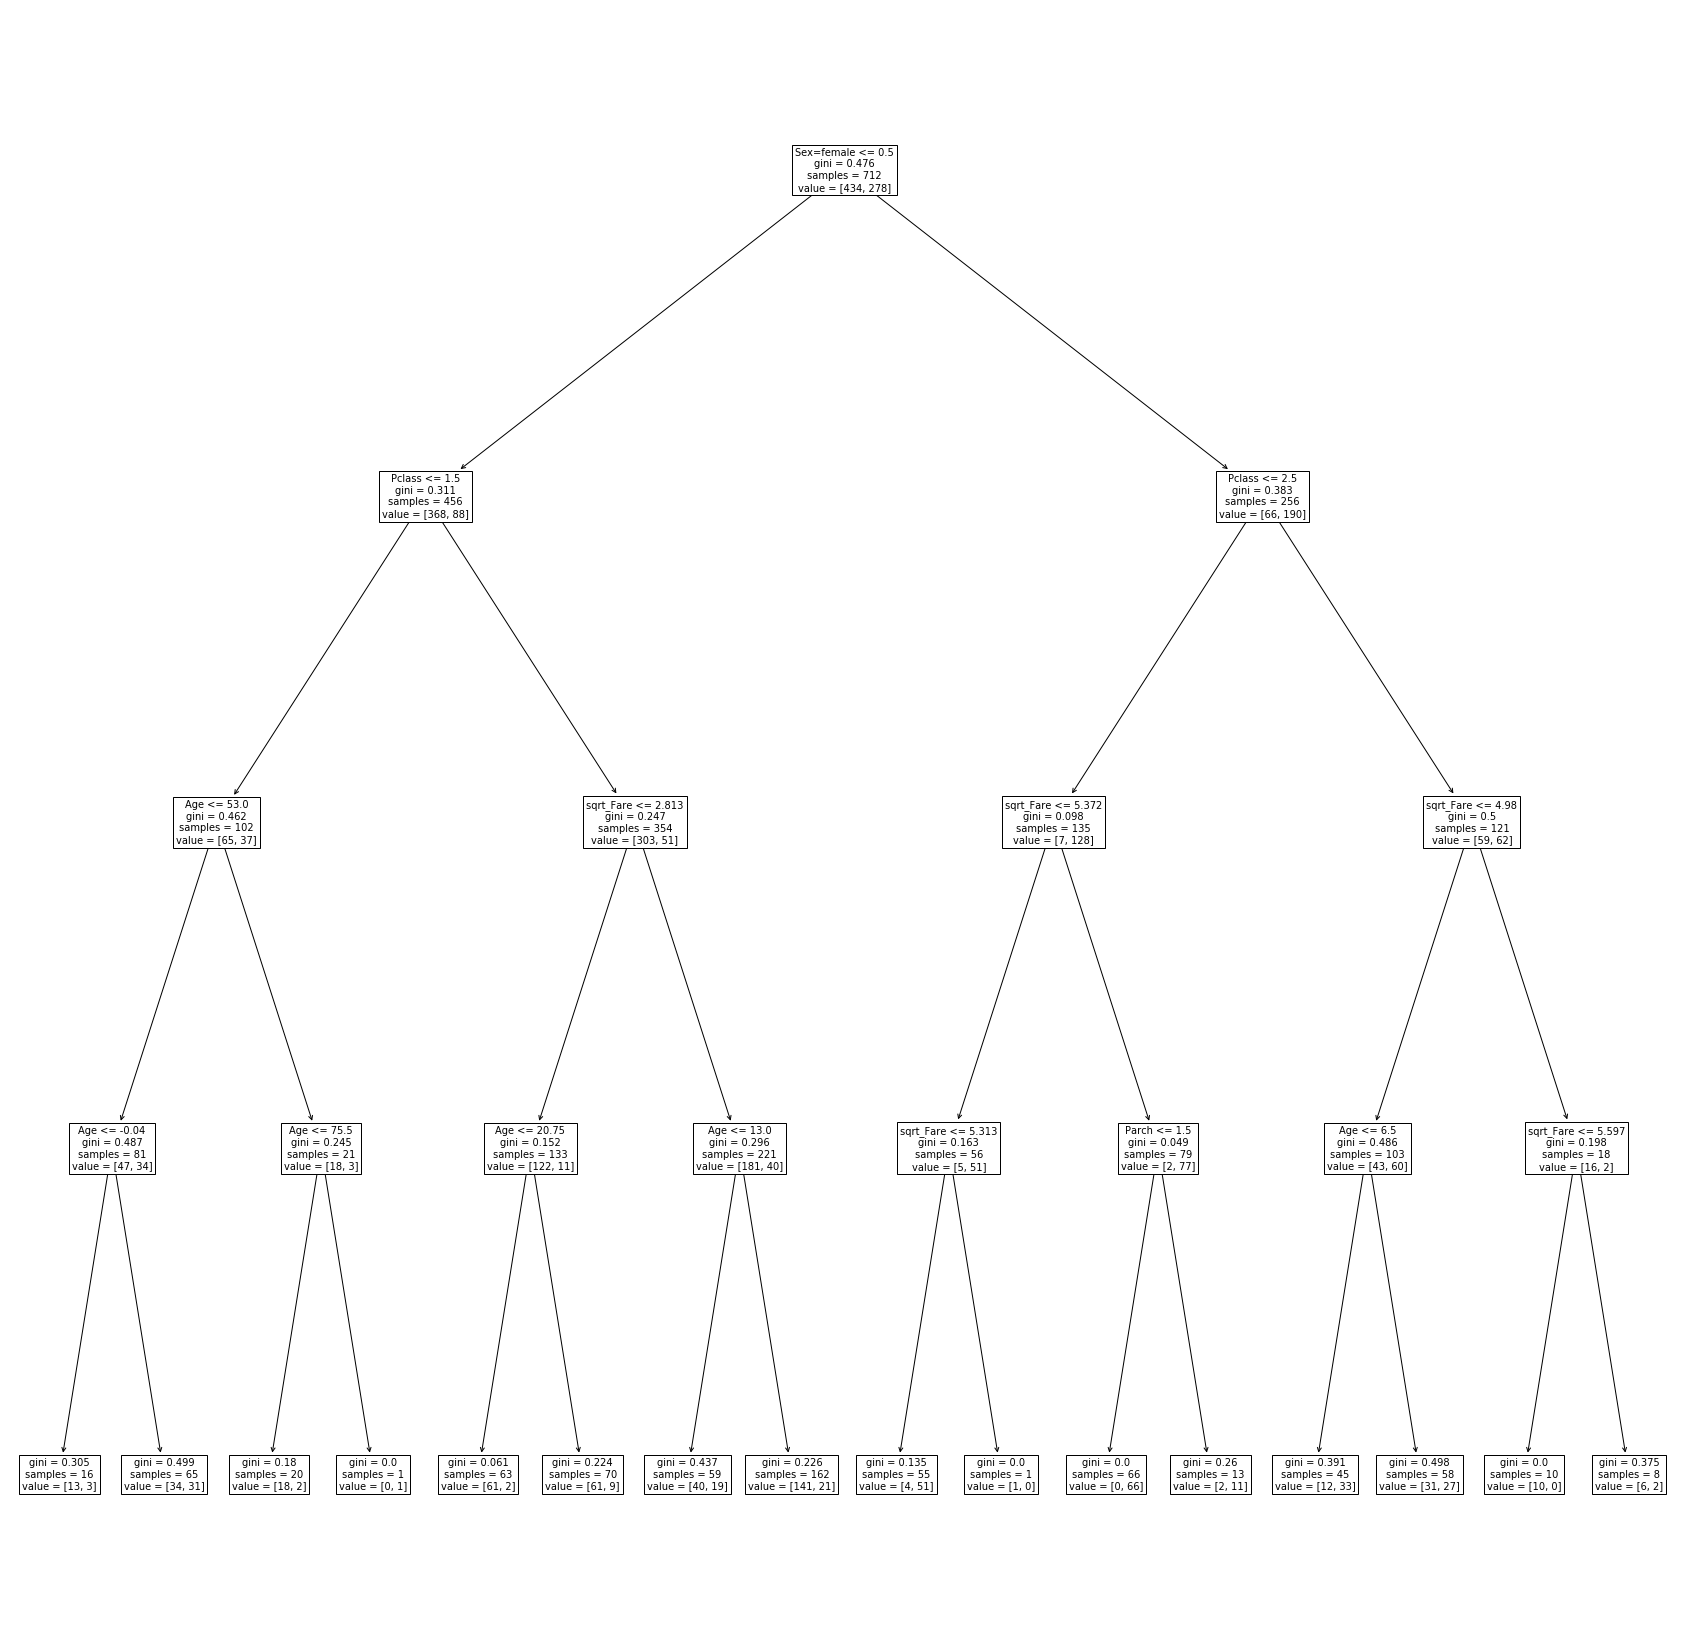

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=[30.0, 30.0])
tree.plot_tree(model, feature_names=features.columns)